In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import BaggingClassifier

In [11]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([[-2,-2]])
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(Y)

In [16]:
indices

array([[1]])

In [17]:
distances

array([[1.]])

In [13]:
print X

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]


In [24]:
x = np.random.rand(10000,3)
y = np.random.rand(10,3)

nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(x)
distances, indices = nbrs.kneighbors(y)

distances

array([[0.03566347],
       [0.00992722],
       [0.04279469],
       [0.04463704],
       [0.02522673],
       [0.0178423 ],
       [0.02420743],
       [0.02892726],
       [0.04910488],
       [0.02149902]])

In [25]:
indices

array([[7498],
       [1710],
       [ 619],
       [8429],
       [6922],
       [3846],
       [1508],
       [5137],
       [4619],
       [9366]])

In [33]:
a = np.array([1, 2, 6, 4, 2, 3, 2])
u, inverse = np.unique(a, return_inverse=True) 
print u
print inverse

[1 2 3 4 6]
[0 1 4 3 1 2 1]


In [36]:
#Here I'm going to try to test an algorithm that searches list a for duplicates and then sums a list b based
#on the duplicates in list a

a = np.array([1, 2, 6, 4, 2, 3, 2])
b = np.ones_like(a)

sum_val = []

for select_id in np.unique(a):
    a_mask = (a==select_id)
    sum_val.append(np.sum(b[a_mask]))
    
print np.unique(a)
print sum_val

[1 2 3 4 6]
[1, 3, 1, 1, 1]


In [5]:
d = np.array([[1.0],[3.0],[5.0],[1.0]])
np.ndarray.flatten(d)

array([1., 3., 5., 1.])

In [39]:
a = [1.0,2.0,3.0]
b = [2.0,2.0,2.0]

np.divide(a,b)

array([0.5, 1. , 1.5])

In [40]:
print np.logspace(-1.0,1.8,20)

[ 0.1         0.14040042  0.19712279  0.27676124  0.38857395  0.54555948
  0.76596782  1.07542208  1.50989716  2.11990202  2.97635144  4.17881006
  5.86706707  8.23738707 11.56532642 16.23776739 22.79789436 32.00834047
 44.93984591 63.09573445]


In [45]:
gp = GaussianProcessRegressor()


In [47]:
bg_gp = BaggingClassifier(base_estimator=GaussianProcessRegressor())

In [17]:
a = np.zeros((6,100,100))
a.nbytes

480000

In [5]:
#Here I want to test some regressors

import numpy as np
import h5py
#from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split

In [6]:
f_halo = h5py.File('../m12i_res_7100_cdm/halo_600.hdf5')

pos_halo = f_halo['position'][:]
mass_halo = f_halo['mass'][:]
radius_halo = f_halo['radius'][:]
vel_halo = f_halo['velocity'][:]

#identify the host                                                                                                   \
                                                                                                                      
host_id = np.argmax(mass_halo)
host_mass = mass_halo[host_id]
host_pos = pos_halo[host_id]
host_vel = vel_halo[host_id]

f = h5py.File('DM_data_w_stars_training.hdf5')

coords = f['PartType1']['Coordinates'][:]
vel = f['PartType1']['Velocities'][:]
mass_ratio = f['PartType1']['Mass_Ratio'][:]

#1) attempt to save memory by reducing number of points                                                               
#   remove everything outside 400 kpc (these shouldn't)                                                               
#   factor in anyways                                                                                                 

#I think I need to merge coords and vel into a                                                                        
#2X6 array                                                                                                            

#Now this matrix is so large we run into memory errors                                                                
#                                                                                                                     
#A few potential solutions:                                                                                           
# 1) reduce the number of input points (limit to dm part within 400 kpc?) [NOPE]                                      
# 2) change algorithm (some might require less memory or some option)                                                 
#    may reduce memory                                                                                                
#    - Try using GaussianProccessRegressor module [X]                                                                 
#    - Try "bagging"                                                                                                  
# 3) run on a processor with more memory or figure out how to parallelize                                             

phase_space_coords =  np.concatenate((coords-host_pos,vel-host_vel),axis=1)

X_train, X_test, y_train, y_test = train_test_split(phase_space_coords,mass_ratio,
                                                    test_size=0.5,random_state=102)

#Now I can use the GaussianProcess to predict                                                                         

#gp = GaussianProcess(corr='squared_exponential')                                                                     
#gp = GaussianProcessRegressor()                                                                                      
#gp.fit(X_train,mass_ratio)                                                                                           

#Try a bagging regressor                                                                                              
#which subsamples and then averages (I think)                                                                         

LR = LinearRegression()
LR.fit(X_train,y_train)


LassoR = Lasso()
LassoR.fit(X_train,y_train)

RidgeR = Ridge()
RidgeR.fit(X_train,y_train)

f.close()
f_halo.close()

#train_test_split will split a number of arrays into a training sample and a test sample
#example:

mass_ratio_LR = LR.predict(X_test)
mass_ratio_Lasso = LassoR.predict(X_test)
mass_ratio_Ridge = RidgeR.predict(X_test)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.0 7.620299327474465
0.004524599173063562
352572
-0.0012960085070535012 0.010456659652044172
0.004539546102783891


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


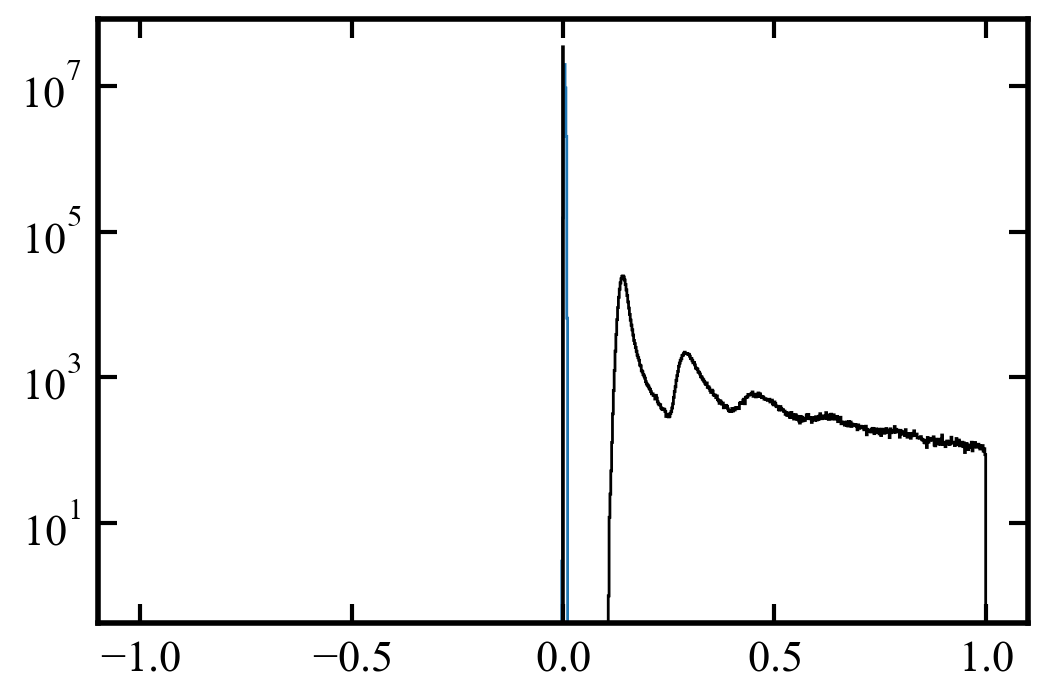

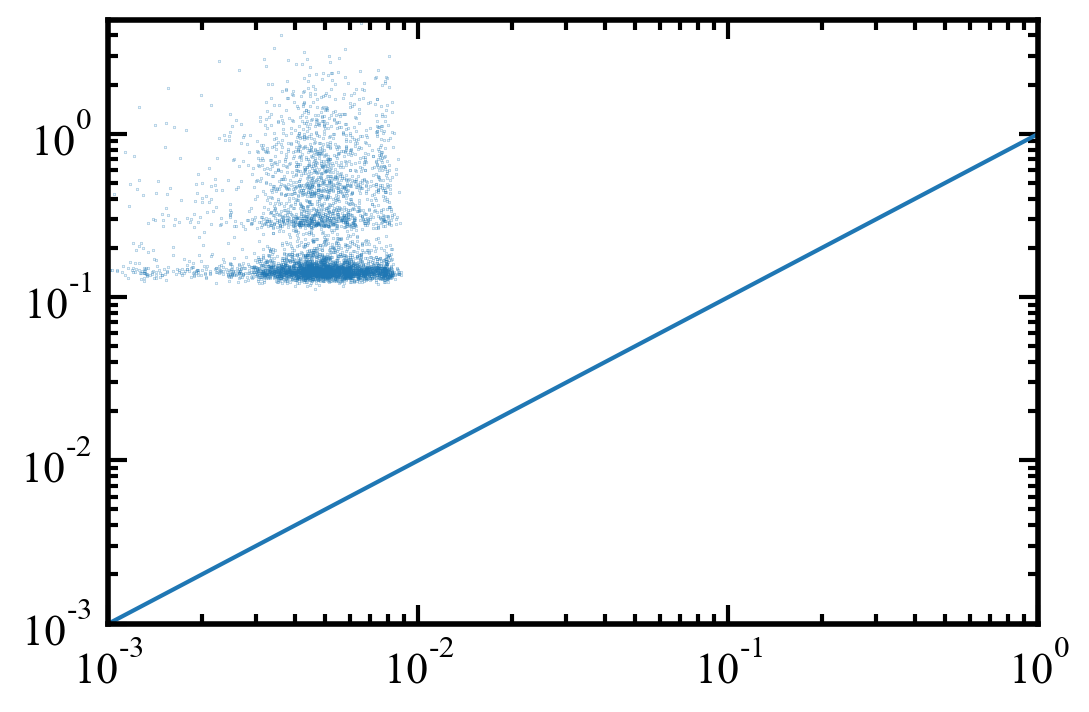

In [ ]:
#LR_error = np.divide(np.abs(np.subtract(y_test,mass_ratio_LR)),y_test)
#Lasso_error = np.divide(np.abs(np.subtract(y_test,mass_ratio_Lasso)),y_test)
#Ridge_error = np.divide(np.abs(np.subtract(y_test,mass_ratio_Ridge)),y_test)

#plt.hist(LR_error,bins=np.linspace(0.0,1.0,100),histtype='step',color='C0',normed=True)
#plt.hist(Lasso_error,bins=np.linspace(0.0,1.0,100),histtype='step',color='C1',normed=True)
#plt.hist(Ridge_error,bins=np.linspace(0.0,1.0,100),histtype='step',color='C2',normed=True)
#plt.show()

print np.min(y_test), np.max(y_test)
print np.mean(y_test)
print len(y_test[::100])

print np.min(mass_ratio_LR), np.max(mass_ratio_LR)
print np.mean(mass_ratio_LR)
hist_bins = np.linspace(-1.0,1.0,1000)

norm_val = False

plt.hist(mass_ratio_LR,bins=hist_bins,histtype='step',color='C0',normed=norm_val)
#plt.hist(mass_ratio_Lasso,bins=1000,histtype='step',color='C1',normed=norm_val)
#plt.hist(mass_ratio_Ridge,bins=hist_bins,histtype='step',color='C2',normed=norm_val)
plt.hist(y_test,bins=hist_bins,histtype='step',color='k',normed=norm_val)
#plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(mass_ratio_LR[::100],y_test[::100],s=0.01)
plt.plot([0.001,5.0],[0.001,5.0])
plt.xlim([0.001,1.0])
plt.ylim([0.001,5.0])
plt.xscale('log')
plt.yscale('log')
plt.show()


In [ ]:
#lets try a support vector machine
from sklearn.svm import NuSVR

SVR_func = NuSVR()
SVR_func.fit(X_train,y_train)
mass_ratio_SVR = SVR_func.predict(X_test)

/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
plt.hist(mass_ratio_SVR,bins=hist_bins,histtype='step',color='C0',normed=norm_val)
#plt.hist(mass_ratio_Lasso,bins=1000,histtype='step',color='C1',normed=norm_val)
#plt.hist(mass_ratio_Ridge,bins=hist_bins,histtype='step',color='C2',normed=norm_val)
plt.hist(y_test,bins=hist_bins,histtype='step',color='k',normed=norm_val)
#plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(mass_ratio_SVR[::100],y_test[::100],s=0.01)
plt.plot([0.001,5.0],[0.001,5.0])
plt.xlim([0.001,1.0])
plt.ylim([0.001,5.0])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

SGD_func = SGDRegressor()
SGD_func.fit(X_train,y_train)
mass_ratio_SGD = SGD.predict(X_test)

In [ ]:
plt.hist(mass_ratio_SGD,bins=hist_bins,histtype='step',color='C0',normed=norm_val)
#plt.hist(mass_ratio_Lasso,bins=1000,histtype='step',color='C1',normed=norm_val)
#plt.hist(mass_ratio_Ridge,bins=hist_bins,histtype='step',color='C2',normed=norm_val)
plt.hist(y_test,bins=hist_bins,histtype='step',color='k',normed=norm_val)
#plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(mass_ratio_SGD[::100],y_test[::100],s=0.01)
plt.plot([0.001,5.0],[0.001,5.0])
plt.xlim([0.001,1.0])
plt.ylim([0.001,5.0])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
2+2